<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/EDA_NilaiPesertaDiklatPPG2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install clickhouse-driver

     |████████████████████████████████| 604 kB 4.7 MB/s 


In [ ]:
!pip install clickhouse-sqlalchemy

     |████████████████████████████████| 1.3 MB 8.1 MB/s 
  Created wheel for clickhouse-sqlalchemy: filename=clickhouse_sqlalchemy-0.1.6-py3-none-any.whl size=39528 sha256=5f2e9b85c72564e749b360b87ba3b11f2bfd90b7bc353e9445d95b12e33b6267
  Stored in directory: /root/.cache/pip/wheels/5c/22/84/4a30a637d63d799dceed04e4fd0d6f8ba01be0841b0efb061f
Successfully built clickhouse-sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.25
    Uninstalling SQLAlchemy-1.4.25:
      Successfully uninstalled SQLAlchemy-1.4.25


In [ ]:
from clickhouse_driver import Client

In [ ]:
client = Client('ec2-18-136-200-246.ap-southeast-1.compute.amazonaws.com',
                port=9000,
                user='admin',
                password='$dm1nCH',
                secure=True,
                verify=False,
                database='ch_elearning')

In [ ]:
result = client.execute('SELECT COUNT(*) FROM ppgdj_mahasiswa_n2020')
print(result)

In [ ]:
result = client.execute('SELECT now(), version()')
print("RESULT: {0}: {1}".format(type(result), result))
for t in result:
    print(" ROW: {0}: {1}".format(type(t), t))
    for v in t:
            print("  COLUMN: {0}: {1}".format(type(v), v))

**Mempersiapkan Library**

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd


# Plotly Packages
from chart_studio import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Put in DataFrame

In [ ]:
df = pd.read_csv("drive/MyDrive/eduBI/vw_ppgdj_mahasiswa_nilai2020_202110051559.csv")

# Let's store the original dataframe in another variable.
original_df = df.copy()

In [ ]:
df1 = df[df["JENIS_DIKLAT"] == "Diklat PPG Daljab (APBN) Angkatan 1"]
df2 = df[df["JENIS_DIKLAT"] == "Diklat PPG Daljab (APBN) Angkatan 2"]
df3 = df[df["JENIS_DIKLAT"] == "Diklat PPG Daljab (APBN) Angkatan 3"]
df4 = df[df["JENIS_DIKLAT"] == "Diklat PPG Daljab (APBN) Angkatan 4"]

In [ ]:
df.head()

Data description

In [ ]:
df.describe()

In [ ]:
print(df.shape)
df.dtypes

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20060 entries, 0 to 20059
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JENIS_DIKLAT  20060 non-null  object 
 1   NOPES         20060 non-null  object 
 2   PM            20060 non-null  float64
 3   PPP           20060 non-null  float64
 4   RPP           20060 non-null  float64
 5   PPL_1         20060 non-null  float64
 6   R_PPL_1       20060 non-null  float64
 7   PPL_2         20060 non-null  float64
 8   R_PPL_2       20060 non-null  float64
 9   DURASI_MENIT  20060 non-null  float64
 10  VISITS        20060 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 1.7+ MB
None


Change Data Type

In [ ]:
df["NOPES"] = df["NOPES"].astype("object")

Distribution of JENIS DIKLAT

In [ ]:
df["JENIS_DIKLAT"].value_counts()

Diklat PPG Daljab (APBN) Angkatan 1    7017
Diklat PPG Daljab (APBN) Angkatan 2    6433
Diklat PPG Daljab (APBN) Angkatan 3    5010
Diklat PPG Daljab (APBN) Angkatan 4    1600
Name: JENIS_DIKLAT, dtype: int64

In [ ]:
df["JENIS_DIKLAT"].value_counts(normalize=True)

Average Values of JENIS_DIKLAT

In [ ]:
df[df["JENIS_DIKLAT"] == "Diklat PPG Daljab (APBN) Angkatan 1"].mean()

NOPES           2.015271e+11
PM              9.537981e+01
PPP             8.823778e+01
RPP             8.843826e+01
PPL_1           8.692965e+01
R_PPL_1         8.688188e+01
PPL_2           8.526237e+01
R_PPL_2         8.701594e+01
DURASI_MENIT    6.234771e+03
VISITS          5.745985e+03
dtype: float64

MIN dan MAX values of JENIS_DIKLAT

In [ ]:
df.apply(np.max)

In [ ]:
df.apply(np.min)

JENIS_DIKLAT    Diklat PPG Daljab (APBN) Angkatan 1
NOPES                                  201500000047
PM                                                0
PPP                                               0
RPP                                               0
PPL_1                                             0
R_PPL_1                                           0
PPL_2                                             0
R_PPL_2                                           0
DURASI_MENIT                                   1944
VISITS                                         2630
dtype: object

Correlation among variables

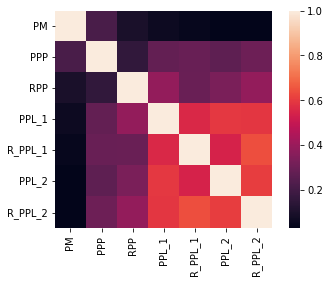

In [ ]:
dfP = df1[['PM','PPP','RPP',
          'PPL_1', 'R_PPL_1', 'PPL_2', 'R_PPL_2']] #Subsetting the data
#          'DURASI_MENIT','VISITS']] #Subsetting the data
cor = dfP.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

Visualizing Data

In [ ]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

In [ ]:
#Subsetting the data
dfP = df4[['PM','PPP','RPP',
          'PPL_1', 'R_PPL_1', 'PPL_2', 'R_PPL_2']]
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dfP.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

In [ ]:
# Pair-wise Scatter Plots
# cols = ['PPL_1', 'R_PPL_1', 'PPL_2', 'R_PPL_2']
cols = ['PM','PPP','RPP','PPL_1', 'R_PPL_1', 'PPL_2', 'R_PPL_2']
pp = sns.pairplot(df1[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)